# Proyek: Predictive Analytic - Klasifikasi Diabetes

Nama: : Jessica Theresia<br>
Email: : me.jessicatheresia@gmail.com<br>
ID Dicoding: : jessica_trs<br>

# Import Library

In [1]:
# Install library

from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Load Data

Dataset yang digunakan adalah Healthcare Diabetes Dataset dari Kaggle yang dapat diunduh di sini https://www.kaggle.com/datasets/nanditapore/healthcare-diabetes. Dataset erdiri dari 2768 baris dan 10 kolom fitur.

In [2]:
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Memuat dataset
df = pd.read_csv("/content/drive/MyDrive/Dicoding ML Submission/ML Terapan/Healthcare-Diabetes.csv")

In [5]:
# Menampilkan 5 baris pertama
print("First 5 records:")
print(df.head())

First 5 records:
   Id  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0   1            6      148             72             35        0  33.6   
1   2            1       85             66             29        0  26.6   
2   3            8      183             64              0        0  23.3   
3   4            1       89             66             23       94  28.1   
4   5            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


# Exploratory Data Analysis (EDA)

## Info Data

In [6]:
print("Informasi Dataset:")
print(df.info())

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB
None


In [7]:
# Statistik deskriptif
print("\nStatistik Deskriptif:")
print(df.describe())


Statistik Deskriptif:
                Id  Pregnancies      Glucose  BloodPressure  SkinThickness  \
count  2768.000000  2768.000000  2768.000000    2768.000000    2768.000000   
mean   1384.500000     3.742775   121.102601      69.134393      20.824422   
std     799.197097     3.323801    32.036508      19.231438      16.059596   
min       1.000000     0.000000     0.000000       0.000000       0.000000   
25%     692.750000     1.000000    99.000000      62.000000       0.000000   
50%    1384.500000     3.000000   117.000000      72.000000      23.000000   
75%    2076.250000     6.000000   141.000000      80.000000      32.000000   
max    2768.000000    17.000000   199.000000     122.000000     110.000000   

           Insulin          BMI  DiabetesPedigreeFunction          Age  \
count  2768.000000  2768.000000               2768.000000  2768.000000   
mean     80.127890    32.137392                  0.471193    33.132225   
std     112.301933     8.076127                  0.3

## Checking Missing Value

In [8]:
# Cek jumlah missing value
print("\nJumlah Missing Value per Kolom:")
print(df.isnull().sum())


Jumlah Missing Value per Kolom:
Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


## Checking Outliers

In [9]:
# Menggunakan IQR method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))
outliers.sum()

,0
Id,0
Pregnancies,16
Glucose,18
BloodPressure,158
SkinThickness,5
Insulin,103
BMI,77
DiabetesPedigreeFunction,97
Age,64
Outcome,0


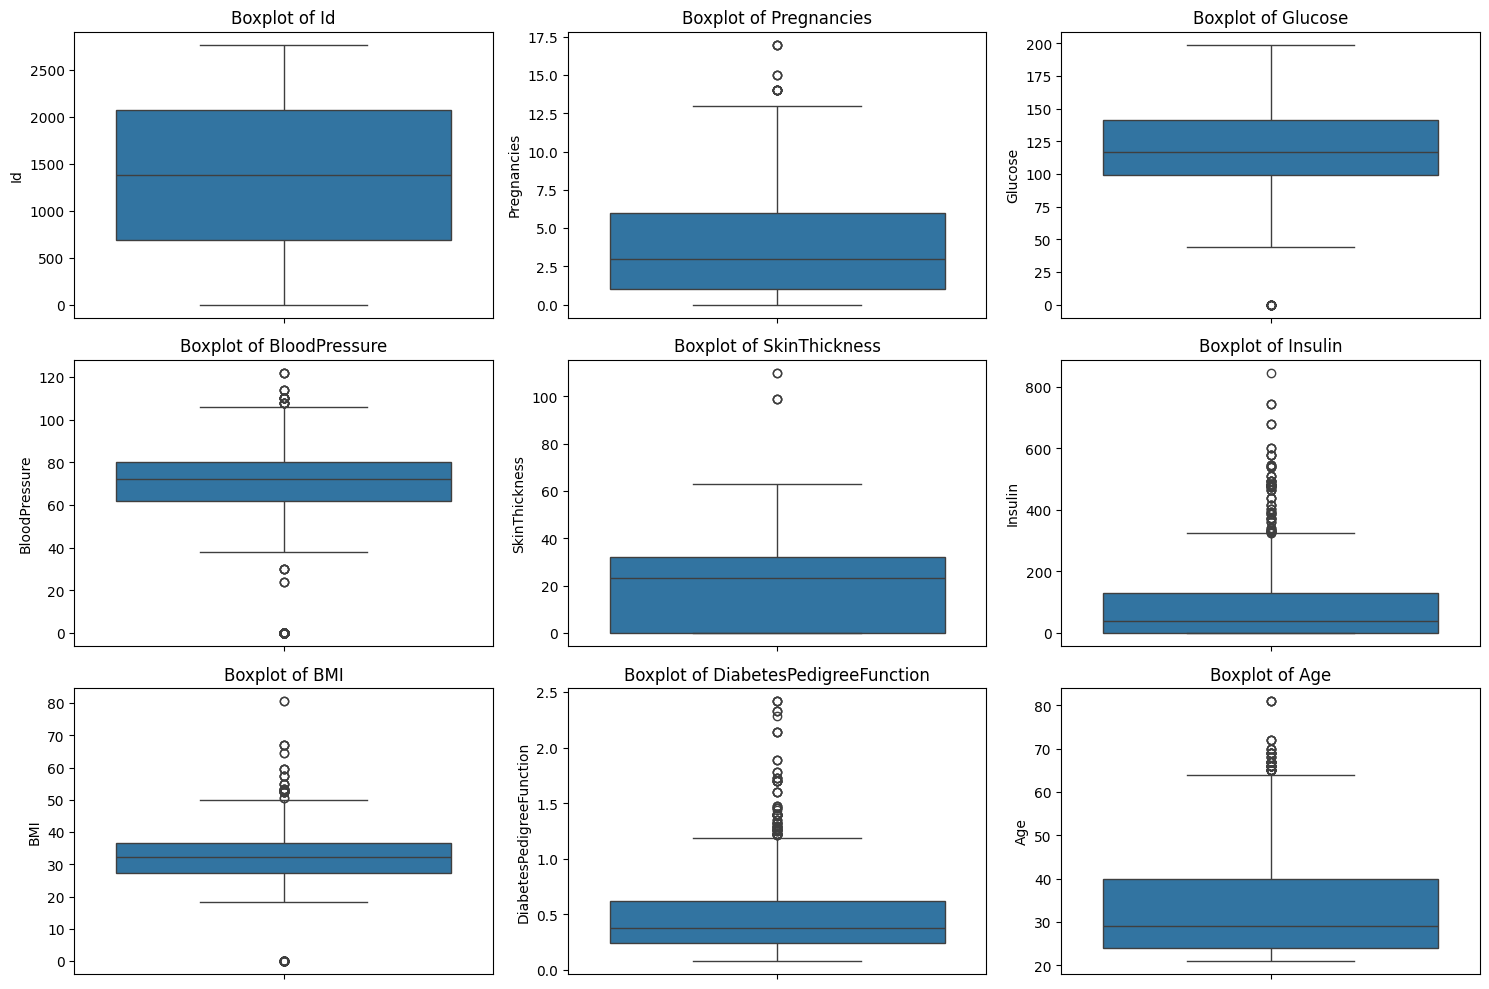

In [10]:
# Visualisasi boxplot semua fitur numerik (kecuali 'Outcome')
numerical_features = df.drop('Outcome', axis=1).columns
plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_features):
    plt.subplot(3, 3, i+1)
    sns.boxplot(data=df[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

## Univariate Analysis

Dilakukan pengecekan distirbusi data pada setiap atribut numerik

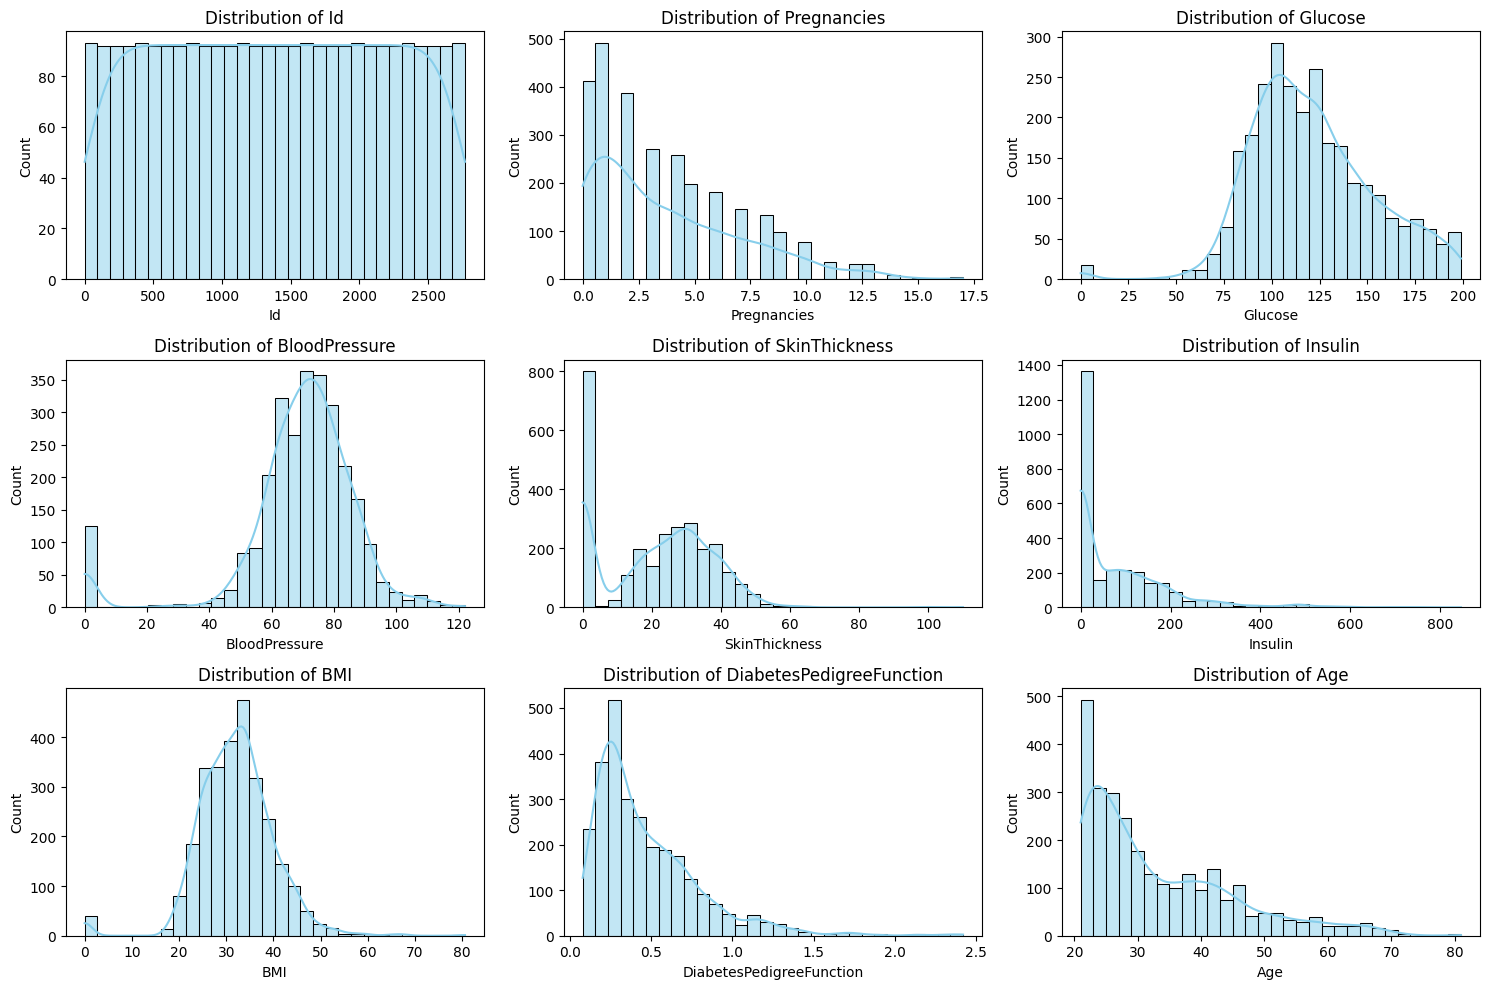

In [11]:
# Plot histogram untuk setiap kolom numerik
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns[:-1]):  # Kecuali Outcome
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

**Insight

EDA menunjukkan beberapa kolom memiliki nilai 0 yang tidak realistis, seperti Glucose, BloodPressure, dan BMI. Visualisasi histogram dan boxplot juga menunjukkan adanya outlier.

## Bivariate Analysis

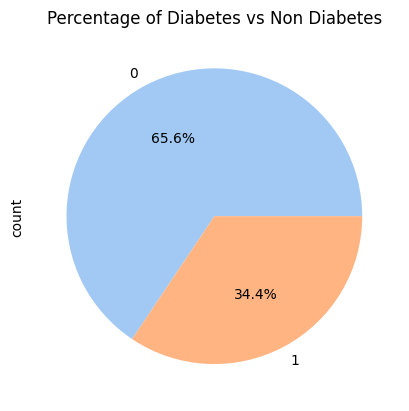

In [12]:
sns.set_palette("pastel")
df['Outcome'].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.title("Percentage of Diabetes vs Non Diabetes")
plt.show()

Dari visualisasi data diatas, dapat disimpulkan bahwa data diabetes dan non diabetes imbalance.

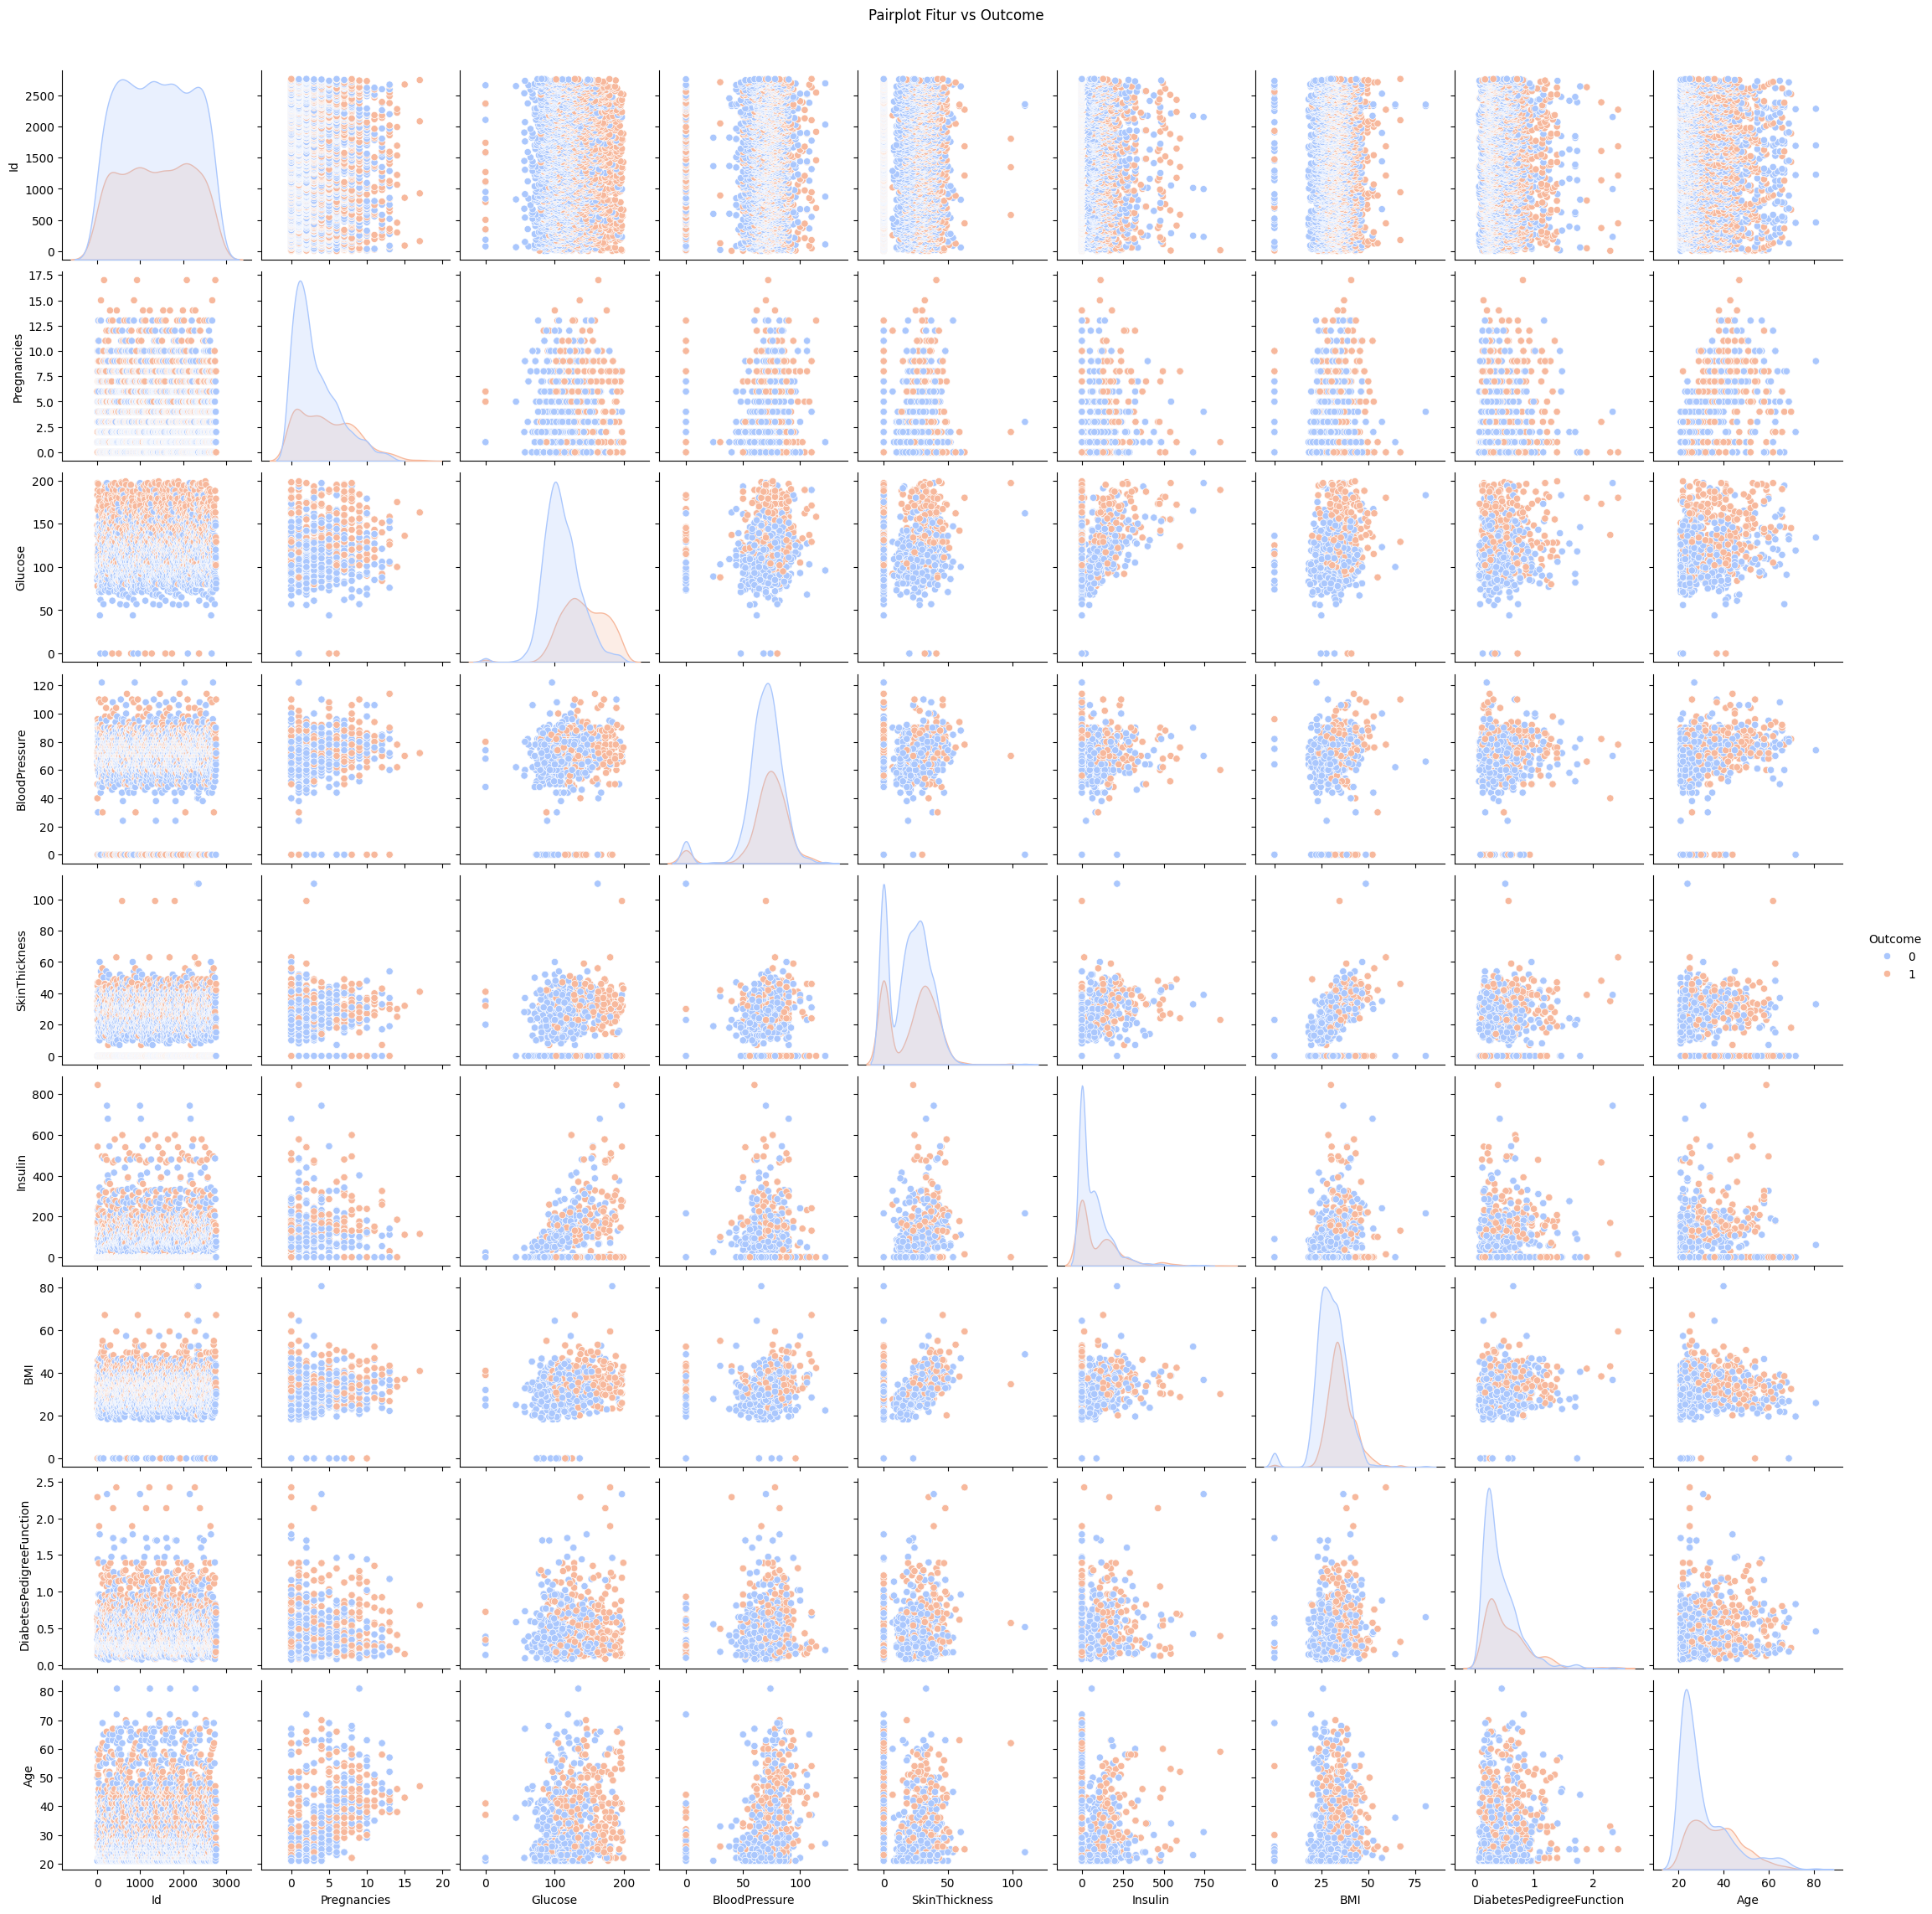

In [13]:
# Visualisasikan pairwise relationship
sns.pairplot(df, hue='Outcome', diag_kind='kde', palette='coolwarm')
plt.suptitle('Pairplot Fitur vs Outcome', y=1.02)
plt.show()

## Multivariate Analysis

Korelasi antar fitur terhadap target Outcome:

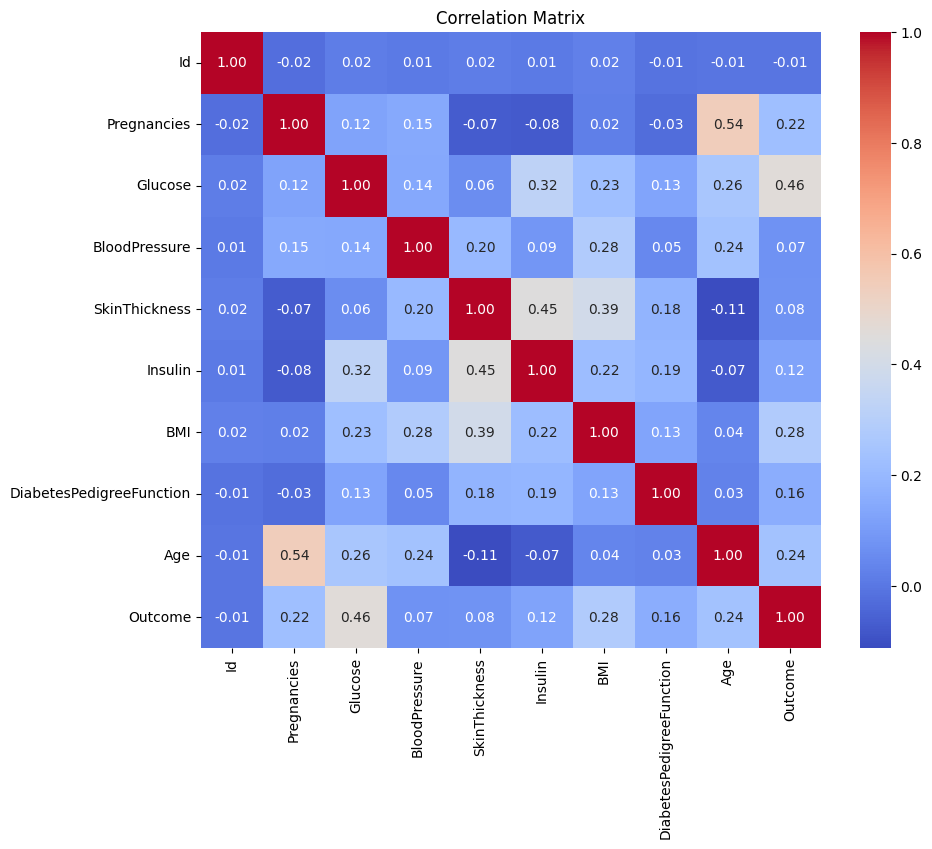

In [14]:
# Korelasi antar variabel
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

Dari heatmap dapat dilihat bahwa Glucose, BMI, dan Age menunjukkan korelasi positif yang kuat dengan Outcome.

Variabel seperti Skin Thickness atau Insulin memiliki korelasi lebih lemah, namun tetap relevan secara klinis.

# Data Preprocessing

## Hapus kolom yang tidak relevan

In [15]:
df = df.drop('Id', axis=1)

print(df.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


## Handling Missing Value

Nilai 0 pada kolom medis diganti dengan NaN, lalu dilakukan imputasi median.

In [16]:
# Kolom-kolom yang tidak seharusnya memiliki nilai 0
cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Ganti nilai 0 dengan NaN
df[cols_with_zero] = df[cols_with_zero].replace(0, np.nan)

print("Jumlah Missing Value (setelah diganti dari nilai 0):")
print(df[cols_with_zero].isnull().sum())

Jumlah Missing Value (setelah diganti dari nilai 0):
Glucose            18
BloodPressure     125
SkinThickness     800
Insulin          1330
BMI                39
dtype: int64


In [17]:
# Isi missing value dengan nilai median
for col in cols_with_zero:
    median_value = df[col].median()
    df[col].fillna(median_value, inplace=True)

print("\nCek missing setelah imputasi:")
print(df.isnull().sum())


Cek missing setelah imputasi:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


<ipython-input-17-3f1fc8ebe148>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_value, inplace=True)


## Handling Outliers

In [18]:
# Winsorizing dengan IQR
for col in df.columns:
    if col != 'Outcome':
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = np.where(df[col] < lower_bound, lower_bound,
                  np.where(df[col] > upper_bound, upper_bound, df[col]))

In [19]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

outliers = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))
outlier_count = outliers.sum().sort_values(ascending=False)

print("Jumlah akhir outlier per kolom:")
print(outlier_count)

Jumlah akhir outlier per kolom:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [20]:
# Simpan dataset bersih
df.to_csv("/content/drive/MyDrive/Dicoding ML Submission/ML Terapan/Cleaned_Healthcare_Diabetes.csv", index=False)

print("Dataset telah disimpan ke Google Drive sebagai Cleaned_Healthcare_Diabetes.csv")

Dataset telah disimpan ke Google Drive sebagai Cleaned_Healthcare_Diabetes.csv


## Split Data

Dataset dibagi menjadi 80% data pelatihan dan 20% data pengujian.

In [21]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Ukuran data latih:", X_train.shape)
print("Ukuran data uji:", X_test.shape)

Ukuran data latih: (2214, 8)
Ukuran data uji: (554, 8)


## Normalisasi Data

 Normalisasi menggunakan StandardScaler agar semua fitur berada pada skala yang sama.

In [22]:
# Inisialisasi scaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Handling Imbalance

In [23]:
print("Distribusi kelas sebelum SMOTE:")
print(y_train.value_counts(normalize=True))

Distribusi kelas sebelum SMOTE:
Outcome
0    0.656278
1    0.343722
Name: proportion, dtype: float64


Menggunakan SMOTE untuk menangani ketidakseimbangan data pada kelas target.

In [24]:
smote = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

print("Distribusi kelas setelah SMOTE:")
print(y_train_resampled.value_counts(normalize=True))

Distribusi kelas setelah SMOTE:
Outcome
0    0.5
1    0.5
Name: proportion, dtype: float64


# Modeling

## Train w/ Basic Models

### 1. KNN


- Berdasarkan jarak antara titik data.
- Kelebihan: Tidak memerlukan pelatihan.
- Kekurangan: Sensitif terhadap noise dan ukuran data.

In [25]:
# Inisialisasi dan latih model KNN
knn_model = KNeighborsClassifier(n_neighbors=15, weights='distance')
knn_model.fit(X_train_resampled, y_train_resampled)

# Prediksi pada data uji
y_pred_knn = knn_model.predict(X_test_scaled)

### 2. Random Forest

- Ensembel dari pohon keputusan.
- Kelebihan: Akurasi tinggi, robust terhadap outlier.
- Kekurangan: Kurang interpretatif.

In [26]:
# Inisialisasi dan latih model Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=101)
rf_model.fit(X_train_resampled, y_train_resampled)

# Prediksi pada data uji
y_pred_rf = rf_model.predict(X_test_scaled)

### Logistic Regression

- Model dasar klasifikasi biner yang memberikan probabilitas suatu kelas.
- Kelebihan: Sederhana, interpretatif.
- Kekurangan: Kurang kuat untuk hubungan non-linear.

In [27]:
# Latih model Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_resampled, y_train_resampled)

# Prediksi pada data uji
y_pred_log = log_model.predict(X_test_scaled)

### Accuracy (before tuning)

In [28]:
print("=== Evaluasi Akurasi Model ===")
print("Accuracy KNN :", accuracy_score(y_test, y_pred_knn))
print("Accuracy Random Forest :", accuracy_score(y_test, y_pred_rf))
print("Accuracy Logistic Regression :", accuracy_score(y_test, y_pred_log))

=== Evaluasi Akurasi Model ===
Accuracy KNN : 0.9891696750902527
Accuracy Random Forest : 0.9909747292418772
Accuracy Logistic Regression : 0.7689530685920578


# Hyperparameter Tuning untuk Logistic Regression

In [29]:
# Parameter grid
param_grid = {
    'penalty': ['elasticnet'],
    'solver': ['saga'],
    'l1_ratio': [0.1, 0.5, 0.9]
}

# Inisialisasi model
lr = LogisticRegression(max_iter=1000, random_state=42)

# Grid search
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, scoring='f1', cv=5, n_jobs=-1)
grid_search.fit(X_train_resampled, y_train_resampled)

# Model terbaik
best_lr = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Prediksi ulang dengan model terbaik
y_pred_best_lr = best_lr.predict(X_test_scaled)

# Hasil akurasi
print("=== Evaluasi Model Logistic Regression (Tuned) ===")
print("Accuracy :", accuracy_score(y_test, y_pred_best_lr))

Best Parameters: {'l1_ratio': 0.1, 'penalty': 'elasticnet', 'solver': 'saga'}
=== Evaluasi Model Logistic Regression (Tuned) ===
Accuracy : 0.7671480144404332


# Evaluations (after tuning)

Metrik yang digunakan:

- Accuracy = (TP + TN) / Total
- Precision = TP / (TP + FP)
- Recall = TP / (TP + FN)
- F1-Score = 2 * (Precision * Recall) / (Precision + Recall)

In [30]:
# Evaluasi performa KNN
print("=== Evaluasi Model KNN ===")
print("Accuracy :", accuracy_score(y_test, y_pred_knn))
print("Precision:", precision_score(y_test, y_pred_knn))
print("Recall   :", recall_score(y_test, y_pred_knn))
print("F1-score :", f1_score(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))

=== Evaluasi Model KNN ===
Accuracy : 0.9891696750902527
Precision: 0.9743589743589743
Recall   : 0.9947643979057592
F1-score : 0.9844559585492227

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       363
           1       0.97      0.99      0.98       191

    accuracy                           0.99       554
   macro avg       0.99      0.99      0.99       554
weighted avg       0.99      0.99      0.99       554



In [31]:
# Evaluasi performa Random Forest
print("=== Evaluasi Model Random Forest ===")
print("Accuracy :", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall   :", recall_score(y_test, y_pred_rf))
print("F1-score :", f1_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

=== Evaluasi Model Random Forest ===
Accuracy : 0.9909747292418772
Precision: 0.984375
Recall   : 0.9895287958115183
F1-score : 0.9869451697127938

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       363
           1       0.98      0.99      0.99       191

    accuracy                           0.99       554
   macro avg       0.99      0.99      0.99       554
weighted avg       0.99      0.99      0.99       554



In [32]:
# Evaluasi akhir Logistic Regression
print("=== Evaluasi Model Logistic Regression (Tuned) ===")
print("Accuracy :", accuracy_score(y_test, y_pred_best_lr))
print("Precision:", precision_score(y_test, y_pred_best_lr))
print("Recall   :", recall_score(y_test, y_pred_best_lr))
print("F1-score :", f1_score(y_test, y_pred_best_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best_lr))

=== Evaluasi Model Logistic Regression (Tuned) ===
Accuracy : 0.7671480144404332
Precision: 0.6435185185185185
Recall   : 0.7277486910994765
F1-score : 0.683046683046683

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.79      0.82       363
           1       0.64      0.73      0.68       191

    accuracy                           0.77       554
   macro avg       0.74      0.76      0.75       554
weighted avg       0.78      0.77      0.77       554



** Insight

KNN menjadi model yang direkomendasikan dari ketiga model dengan memprioritaskan recall tertinggi yaitu 0.9948 artinya, hampir semua kasus positif (penyakit) berhasil dideteksi dengan benar. Artinya, model tidak melewatkan satu pun pasien yang benar-benar mengidap diabetes dalam prediksinya (False Negative = 0). Hal ini sangat penting dalam konteks medis, karena salah satu tujuan utama adalah mendeteksi semua kasus positif secara tepat.

# Save Model

In [33]:
joblib.dump(knn_model, 'knn_model.pkl')

['knn_model.pkl']

In [34]:
joblib.dump(rf_model, 'rf_model.pkl')

['rf_model.pkl']

In [35]:
joblib.dump(best_lr, 'lr_model.pkl')

['lr_model.pkl']

In [36]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

# Testing

streamlit webApp : https://predictive-analytic-diabetes.streamlit.app/

github repo : https://github.com/Jejetrs/Predictive-Analytic---Diabetes.git